# Plots

In [2]:
# disable any warnings
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
df = pd.read_csv('../data/processed/squawk7700_processed_final_v2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       635 non-null    object 
 1   icao24          635 non-null    object 
 2   registration    635 non-null    object 
 3   typecode        635 non-null    object 
 4   origin          623 non-null    object 
 5   landing         447 non-null    object 
 6   destination     621 non-null    object 
 7   diverted        219 non-null    object 
 8   tweet_problem   301 non-null    object 
 9   tweet_result    301 non-null    object 
 10  tweet_fueldump  301 non-null    object 
 11  avh_id          84 non-null     object 
 12  avh_problem     84 non-null     object 
 13  avh_result      84 non-null     object 
 14  avh_fueldump    84 non-null     object 
 15  airlineName     635 non-null    object 
 16  isFreighter     635 non-null    bool   
 17  productionLine  635 non-null    obj

## Age BAR

##### Data prep

In [4]:
bins = np.arange(0, df['ageYears'].max() + 5, 5)
df['age_categories'] = pd.cut(df['ageYears'], bins=bins, right=False)

### Relevant for Flight Emergencies:
- **typecode**: Indicates the aircraft type; some types may have higher incident rates.
- **origin**: The airport of departure; relevant for analyzing patterns related to specific airports.
- **landing**: The landing airport; crucial for understanding emergency landing patterns.
- **destination**: Indicates the planned route.
- **diverted**: Directly relevant as it indicates whether the flight was diverted.
- **tweet_problem**: Likely contains information about problems during the flight.
- **tweet_result**: Could indicate the outcome of the emergency.
- **tweet_fueldump**: Indicates whether fuel was dumped, often associated with emergencies.
- **avh_problem**: Emergency-related problems reported.
- **avh_result**: Results related to emergency actions.
- **avh_fueldump**: Fuel dumping, which is relevant for emergencies.
- **manufacturer**: Aircraft manufacturer could indicate patterns of issues with specific makes/models.

### Not Relevant for Flight Emergency Analysis:
- **flight_id**: Unique identifier for a flight; only useful for tracking, not for analysis.
- **icao24**: Aircraft identifier; not directly linked to emergency analysis.
- **registration**: Registration of the aircraft; not emergency-related.
- **airlineName**: Airline name; might provide limited insight unless correlated with emergencies.
- **productionLine**: Not directly relevant unless investigating manufacturing patterns.
- **age_categories**: Aircraft age might have limited relevance unless analyzing age-specific issues.

In [5]:
df.head()

,flight_id,icao24,registration,typecode,origin,landing,destination,diverted,tweet_problem,tweet_result,...,avh_id,avh_problem,avh_result,avh_fueldump,airlineName,isFreighter,productionLine,ageYears,manufacturer,age_categories
0,ARG1511_20180101,e06442,LV-FQB,B738,SACO,SABE,SABE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Aerolineas Argentinas,False,Boeing 737 NG,13.2,Boeing,"[10.0, 15.0)"
1,DAL14_20180101,a14c29,N183DN,B763,KATL,NaN,EDDF,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Delta Air Lines,False,Boeing 767,31.6,Boeing,"[30.0, 35.0)"
2,JBU263_20180108,aa600a,N768JB,A320,KJFK,NaN,KSEA,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,JetBlue Airways,False,Airbus A320,15.9,Airbus,"[15.0, 20.0)"
3,DAL65_20180108,ab2855,N818NW,A333,KATL,KLAX,KLAX,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Delta Air Lines,False,Airbus A330,17.4,Airbus,"[15.0, 20.0)"
4,EDW24_20180111,4b1901,HB-JMF,A343,LSZH,LSZH,MMUN,LSZH,engine,return,...,4b382175,engine,return,unknown,Edelweiss Air,False,Airbus A340,21.1,Airbus,"[20.0, 25.0)"


In [6]:
df.isna().sum()

flight_id           0
icao24              0
registration        0
typecode            0
origin             12
landing           188
destination        14
diverted          416
tweet_problem     334
tweet_result      334
tweet_fueldump    334
avh_id            551
avh_problem       551
avh_result        551
avh_fueldump      551
airlineName         0
isFreighter         0
productionLine      0
ageYears            0
manufacturer        0
age_categories      0
dtype: int64

In [7]:
# let's subset non-null values, one dataframe for avh-related and other for tweet-related

# Subset data for avh-related columns
df_avh = df[df[['avh_problem', 'avh_result', 'avh_fueldump']].notnull().any(axis=1)]

# Subset data for tweet-related columns
df_tweet = df[df[['tweet_problem', 'tweet_result', 'tweet_fueldump']].notnull().any(axis=1)]

df_avh.head()

,flight_id,icao24,registration,typecode,origin,landing,destination,diverted,tweet_problem,tweet_result,...,avh_id,avh_problem,avh_result,avh_fueldump,airlineName,isFreighter,productionLine,ageYears,manufacturer,age_categories
4,EDW24_20180111,4b1901,HB-JMF,A343,LSZH,LSZH,MMUN,LSZH,engine,return,...,4b382175,engine,return,unknown,Edelweiss Air,False,Airbus A340,21.1,Airbus,"[20.0, 25.0)"
16,AFR032_20180209,3949e1,F-GSPB,B772,LFPO,LFPO,KJFK,LFPO,technical,return,...,4b4b9911,engine,return,unknown,Air France,False,Boeing 777,26.6,Boeing,"[25.0, 30.0)"
21,BGA143F_20180226,394a65,F-GSTF,A3ST,EGNR,EDHI,EDHI,NaN,NaN,NaN,...,4b57310c,smoke_burn_smell_flames,planned,unknown,Airbus Transport International,False,Airbus A300,23.9,Airbus,"[20.0, 25.0)"
24,RYR3ZK_20180228,4ca678,EI-FOV,B738,LPPT,LPPT,LPPR,LPPT,unclear,return,...,4b592dcf,cabin_pressure,return,unknown,Ryanair,False,Boeing 737 NG,8.7,Boeing,"[5.0, 10.0)"
27,DAL445_20180303,ab7ae4,N839MH,B764,LIRF,LFPG,KJFK,LFPG,unclear,diverted,...,4b5b3cf5,instrument,diverted,fueldump,Delta Air Lines,False,Boeing 767,23.8,Boeing,"[20.0, 25.0)"


In [8]:
# List of avh-related columns
avh_columns = ['avh_problem', 'avh_result', 'avh_fueldump']

# Display distinct values for each avh-related column
distinct_avh_values = {col: df[col].dropna().unique() for col in avh_columns}

distinct_avh_values


{'avh_problem': array(['engine', 'smoke_burn_smell_flames', 'cabin_pressure',
        'instrument', 'hot_air_leak', 'cracked_windshield',
        'weather_damage', 'hydraulics', 'landing_gear', 'fuel_leak',
        'medical', 'misc', 'slats', 'maintenance', 'air_condition', 'bird',
        'brakes', 'heating', 'flaps'], dtype=object),
 'avh_result': array(['return', 'planned', 'diverted'], dtype=object),
 'avh_fueldump': array(['unknown', 'fueldump', 'hold_to_reduce'], dtype=object)}

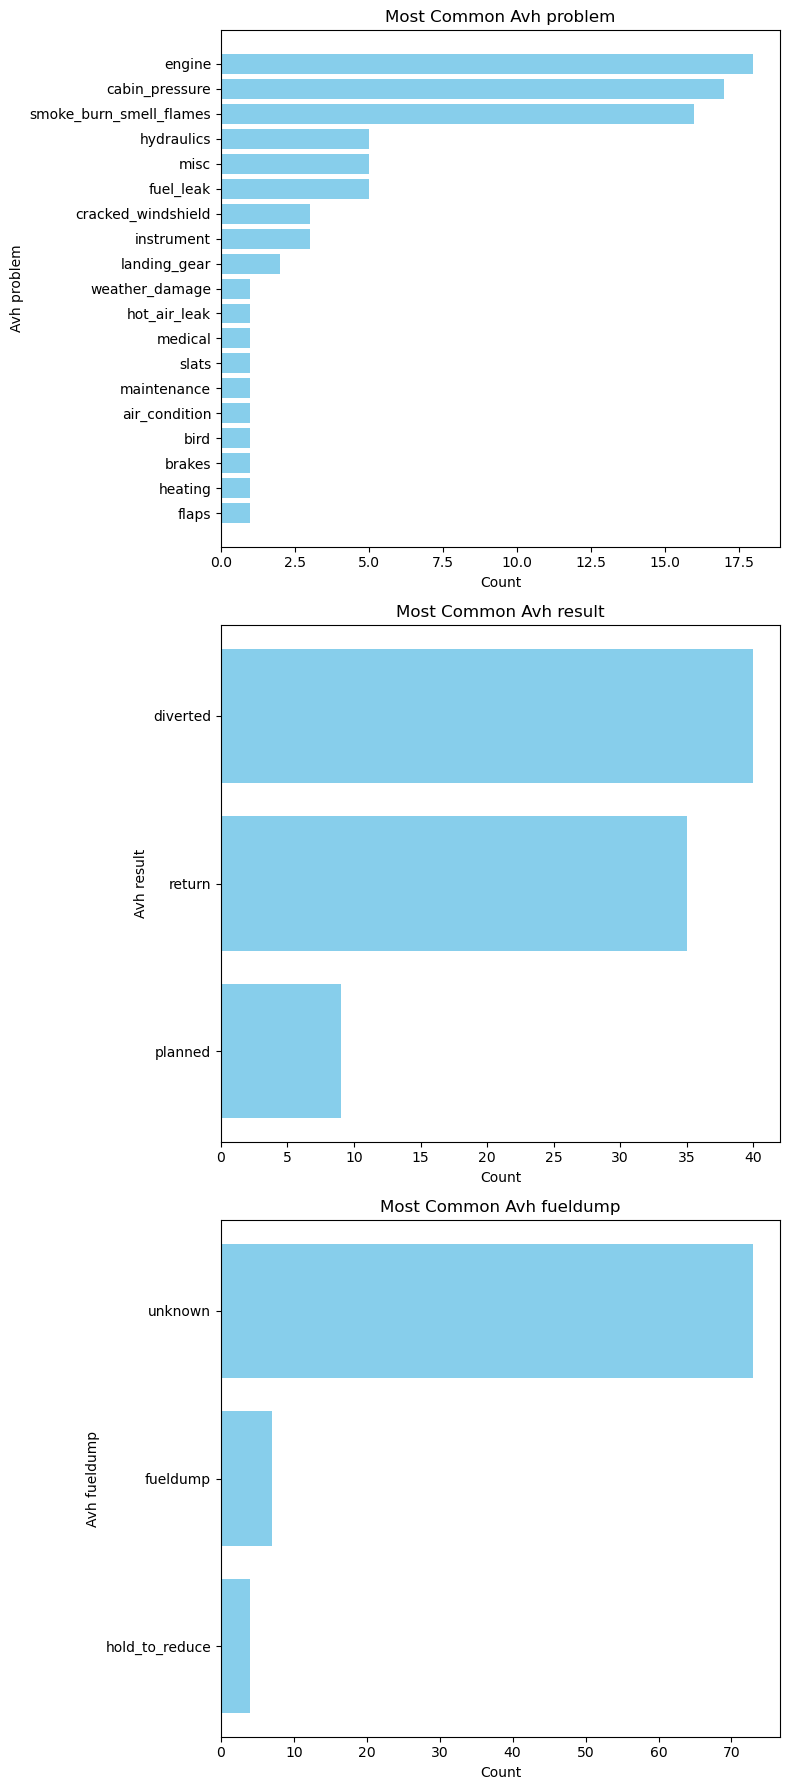

In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(8, 18))

columns = ['avh_problem', 'avh_result', 'avh_fueldump']

for i, col in enumerate(columns):
    counts = df[col].value_counts()
    axes[i].barh(counts.index, counts.values, color='skyblue')
    axes[i].invert_yaxis()
    axes[i].set_title(f'Most Common {col.replace("_", " ").capitalize()}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col.replace("_", " ").capitalize())

plt.tight_layout()
plt.show()


In [11]:
subset_categories = ['engine', 'cabin_pressure', 'smoke_burn_smell_flames', 'hydraulics','misc', 'fuel_leak', 'cracked_windshield', 'instrument', 'landing_gear']
filtered_df = df[df['avh_problem'].isin(subset_categories)]

grouped = filtered_df.groupby(['typecode', 'avh_problem']).size().reset_index(name='count')
most_common_problems_by_aircraft = grouped.loc[grouped.groupby('typecode')['count'].idxmax()]
most_common_problems_by_aircraft = most_common_problems_by_aircraft.sort_values(by='count', ascending=False)
most_common_problems_by_aircraft.head(10)



,typecode,avh_problem,count
47,BCS3,engine,3
6,A320,smoke_burn_smell_flames,3
0,A319,cabin_pressure,2
21,B738,cabin_pressure,2
38,B772,engine,2
33,B763,fuel_leak,2
31,B752,cabin_pressure,2
30,B748,smoke_burn_smell_flames,2
7,A321,cabin_pressure,2
11,A333,cabin_pressure,2


In [27]:
multiple_problems = filtered_df.groupby(['typecode', 'avh_problem']).size().reset_index(name='count')
problem_list = multiple_problems.groupby('typecode')['avh_problem'].apply(list).reset_index(name='problem_list')
problem_list['problem_count'] = problem_list['problem_list'].apply(len)
multiple_instances = problem_list[problem_list['problem_count'] > 1]

multiple_instances


,typecode,problem_list,problem_count
0,A319,"[cabin_pressure, smoke_burn_smell_flames]",2
1,A320,"[cabin_pressure, engine, fuel_leak, hydraulics...",5
2,A321,"[cabin_pressure, engine, smoke_burn_smell_flames]",3
4,A333,"[cabin_pressure, engine, hydraulics]",3
12,B738,"[cabin_pressure, engine, fuel_leak, hydraulics...",7
16,B752,"[cabin_pressure, smoke_burn_smell_flames]",2
17,B763,"[fuel_leak, hydraulics, smoke_burn_smell_flames]",3
18,B764,"[cracked_windshield, instrument]",2
19,B772,"[engine, landing_gear, smoke_burn_smell_flames]",3
21,B788,"[cracked_windshield, engine]",2


In [12]:
# Group by typecode and avh_problem to check if a problem occurred multiple times for the same aircraft
problem_occurrences = filtered_df.groupby(['typecode', 'avh_problem']).size().reset_index(name='occurrence_count')

# Filter rows where the same problem occurred at least twice
problems_occurred_twice = problem_occurrences[problem_occurrences['occurrence_count'] > 1]

# Create a new dataframe with typecode and a list of such problems
repeated_problems_same_aircraft = problems_occurred_twice.groupby('typecode')['avh_problem'].apply(list).reset_index(name='repeated_problems')

repeated_problems_same_aircraft


,typecode,repeated_problems
0,A319,[cabin_pressure]
1,A320,"[fuel_leak, hydraulics, smoke_burn_smell_flames]"
2,A321,"[cabin_pressure, engine]"
3,A333,[cabin_pressure]
4,B738,"[cabin_pressure, engine]"
5,B748,[smoke_burn_smell_flames]
6,B752,"[cabin_pressure, smoke_burn_smell_flames]"
7,B763,[fuel_leak]
8,B772,"[engine, smoke_burn_smell_flames]"
9,BCS3,[engine]


In [39]:
df_avh[(df_avh['avh_problem']=='cabin_pressure') & (df_avh['typecode']=='A319')]

df_avh[(df_avh['avh_problem']=='fuel_leak') & (df_avh['typecode']=='A320')]

,flight_id,icao24,registration,typecode,origin,landing,destination,diverted,tweet_problem,tweet_result,...,avh_id,avh_problem,avh_result,avh_fueldump,airlineName,isFreighter,productionLine,ageYears,manufacturer,age_categories
123,AZA875_20180719,4ca82e,EI-DTN,A320,GMMN,NaN,LIRF,LIEE,unclear,diverted,...,4bb636ac,fuel_leak,diverted,unknown,ITA Airways,False,Airbus A320,15.0,Airbus,"[15.0, 20.0)"
182,AFR17DA_20181017,392af8,F-GKXY,A320,LIRF,LIMC,LFPG,LIMC,technical,diverted,...,4bf2321a,fuel_leak,diverted,unknown,Air France,False,Airbus A320,15.0,Airbus,"[15.0, 20.0)"


In [10]:
age_category_counts = df['age_categories'].value_counts().sort_index().reset_index()
age_category_counts['age_categories_str'] = age_category_counts['age_categories'].astype(str)
age_category_counts

,age_categories,count,age_categories_str
0,"[0.0, 5.0)",0,"[0.0, 5.0)"
1,"[5.0, 10.0)",155,"[5.0, 10.0)"
2,"[10.0, 15.0)",121,"[10.0, 15.0)"
3,"[15.0, 20.0)",115,"[15.0, 20.0)"
4,"[20.0, 25.0)",132,"[20.0, 25.0)"
5,"[25.0, 30.0)",67,"[25.0, 30.0)"
6,"[30.0, 35.0)",37,"[30.0, 35.0)"
7,"[35.0, 40.0)",6,"[35.0, 40.0)"
8,"[40.0, 45.0)",0,"[40.0, 45.0)"
9,"[45.0, 50.0)",2,"[45.0, 50.0)"


In [32]:
age_category_counts['age_categories'][0]

Interval(0.0, 5.0, closed='left')

##### Plot

In [8]:
fig = go.Figure(data=[
    go.Bar(x=age_category_counts['age_categories_str'], y=age_category_counts['count'], name="Age", marker_color="red")
])

fig.update_layout(
    title={'text': "Number of IFE Aircrafts per Age Category", 'font': {"size": 24}},
    xaxis_title="Age Category (Years)",
    yaxis_title="IFE Aircraft Frequency"
)

## Frequency per type BAR

##### Data prep

In [57]:
type_name_frequency = df.groupby('typeName').flight_id.count().sort_values(ascending=False)
type_name_frequency.index

Index(['Airbus A320', 'Boeing 737-800', 'Airbus A319', 'Boeing 737',
       'Embraer 175', 'Boeing 767-300', 'Airbus A321', 'Boeing 757-200',
       'Boeing 737-700', 'Boeing 787-8', 'Boeing 777-200', 'Boeing 777',
       'Airbus A330', 'Canadair CRJ 900', 'Airbus A330-200', 'Boeing 737-900',
       'Boeing 777-300', 'Boeing 787-9', 'Boeing 747-400',
       'Airbus A320 (Sharklets)', 'De Havilland Canada DHC-8-400 Dash 8Q',
       'Embraer 145', 'Airbus A330-300', 'Boeing 747',
       'McDonnell Douglas MD-11', 'Canadair CRJ 200', 'Boeing 767-400',
       'Airbus A340-300', 'Embraer 170', 'Airbus A300-600', 'Airbus A380-800',
       'Airbus A321 (Sharklets)', 'Boeing 737-600', 'Boeing 767', 'Boeing 757',
       'Embraer Pheom 300', 'De Havilland Canada DHC-8-200 Dash 8 / 8Q',
       'Cessna 172', 'ATR 72', 'Boeing 747-8', 'Airbus A300', 'Boeing 717',
       'Canadair CRJ-701ER', 'BAe Avro RJ85', 'Bombardier Challenger 300',
       'Airbus A220-300', 'Sukhoi Superjet 100', 'Boeing 737-4

In [52]:
df['typeName']

0      Boeing 737-800
1      Boeing 767-300
2         Airbus A320
3         Airbus A330
4         Airbus A340
            ...      
863      Boeing 787-8
864      Boeing 787-8
865    Boeing 737-800
866    Boeing 737-800
867       Embraer 175
Name: typeName, Length: 868, dtype: object

##### Plot

In [ ]:
fig2 = go.Figure(data=[
    go.Bar(x=type_name_frequency.head(10).index, y=type_name_frequency.head(10).values, name="Type", marker_color="green")
])

fig2.update_layout(
    title={'text': "Top 10 Most Frequent IFE Aircrafts", 'font': {"size": 24}},
    xaxis_title="Aircraft Type",
    yaxis_title="IFE Aircraft Frequency",
)

## Age + Frequency SCATTER

##### Data Prep

In [76]:
type_name_frequency_df = type_name_frequency.reset_index()
type_name_frequency_df.rename(columns={'flight_id':'frequency'},inplace=True)
type_name_frequency_df

,typeName,frequency
0,Airbus A320,115
1,Boeing 737-800,112
2,Airbus A319,55
3,Boeing 737,47
4,Embraer 175,40
...,...,...
94,Challenger 300,1
95,Airbus A340-600,1
96,Beechcraft 200 Super King Air,1
97,Airbus A340-500,1


In [74]:
median_age = df.groupby('typeName').ageYears.median()
median_age.dropna(inplace=True)
median_age_df = median_age.reset_index()
median_age_df.rename(columns={'ageYears':'ageYears_median'}, inplace=True)
median_age_df

,typeName,ageYears_median
0,ATR 72,10.90
1,Airbus A220-300,6.80
2,Airbus A300,27.05
3,Airbus A300-600,31.80
4,Airbus A300-600F,26.10
...,...,...
72,Hawker 400XP,19.40
73,McDonnell Douglas MD-11,32.40
74,McDonnell Douglas MD-88,37.70
75,McDonnell Douglas MD-90,25.65


In [78]:
freq_medianage_merged = type_name_frequency_df.merge(median_age_df, on='typeName')
freq_medianage_merged

,typeName,frequency,ageYears_median
0,Airbus A320,115,15.0
1,Boeing 737-800,112,13.6
2,Airbus A319,55,19.7
3,Boeing 737,47,8.4
4,Embraer 175,40,8.0
...,...,...,...
72,Cessna 510 Citation Mustang,1,15.5
73,Cessna 560 Citation Excel,1,16.6
74,Challenger 300,1,16.1
75,Airbus A340-600,1,18.0


##### Plot

In [ ]:
fig3 = go.Figure(data=[
    go.Scatter(x=freq_medianage_merged['ageYears_median'], y=freq_medianage_merged['frequency'], name="Type",mode='markers',hovertext=freq_medianage_merged['typeName'], marker_color="blue")
])

fig3.update_layout(
    title={'text': "Age and Frequency per Aircraft Type", 'font': {"size": 24}},
    xaxis_title="Median Age (Years)",
    yaxis_title="IFE Aircraft Frequency",
)